In [2]:
# data_preprocessing.py

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [3]:
# Step 1: Import the dataset
# Replace with your dataset path
df = pd.read_csv("D:\project\Elevate\Task 1\Titanic-Dataset.csv")

# Explore basic info
print("\nBasic Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

print("\nNumber of Null Values per Column:")
print(df.isnull().sum())



Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Summary Statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.52300

In [4]:
# Step 2: Handle missing values using mean/median
# Separate numerical and categorical features
numerical_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Impute numerical columns using mean
num_imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])

# Impute categorical columns using most frequent (mode)
cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

print("\nMissing values after imputation:")
print(df.isnull().sum())



Missing values after imputation:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [5]:
# Step 3: Convert categorical features to numerical
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

print("\nData after encoding categorical features:")
print(df.head())




Data after encoding categorical features:
   PassengerId  Survived  Pclass  Name  Sex   Age  SibSp  Parch  Ticket  \
0          1.0       0.0     3.0   108    1  22.0    1.0    0.0     523   
1          2.0       1.0     1.0   190    0  38.0    1.0    0.0     596   
2          3.0       1.0     3.0   353    0  26.0    0.0    0.0     669   
3          4.0       1.0     1.0   272    0  35.0    1.0    0.0      49   
4          5.0       0.0     3.0    15    1  35.0    0.0    0.0     472   

      Fare  Cabin  Embarked  
0   7.2500     47         2  
1  71.2833     81         0  
2   7.9250     47         2  
3  53.1000     55         2  
4   8.0500     47         2  


In [6]:
# Step 4: Normalize/Standardize numerical features
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("\nData after standardization:")
print(df.head())


Data after standardization:
   PassengerId  Survived    Pclass  Name  Sex       Age     SibSp     Parch  \
0    -1.730108 -0.789272  0.827377   108    1 -0.592481  0.432793 -0.473674   
1    -1.726220  1.266990 -1.566107   190    0  0.638789  0.432793 -0.473674   
2    -1.722332  1.266990  0.827377   353    0 -0.284663 -0.474545 -0.473674   
3    -1.718444  1.266990 -1.566107   272    0  0.407926  0.432793 -0.473674   
4    -1.714556 -0.789272  0.827377    15    1  0.407926 -0.474545 -0.473674   

   Ticket      Fare  Cabin  Embarked  
0     523 -0.502445     47         2  
1     596  0.786845     81         0  
2     669 -0.488854     47         2  
3      49  0.420730     55         2  
4     472 -0.486337     47         2  


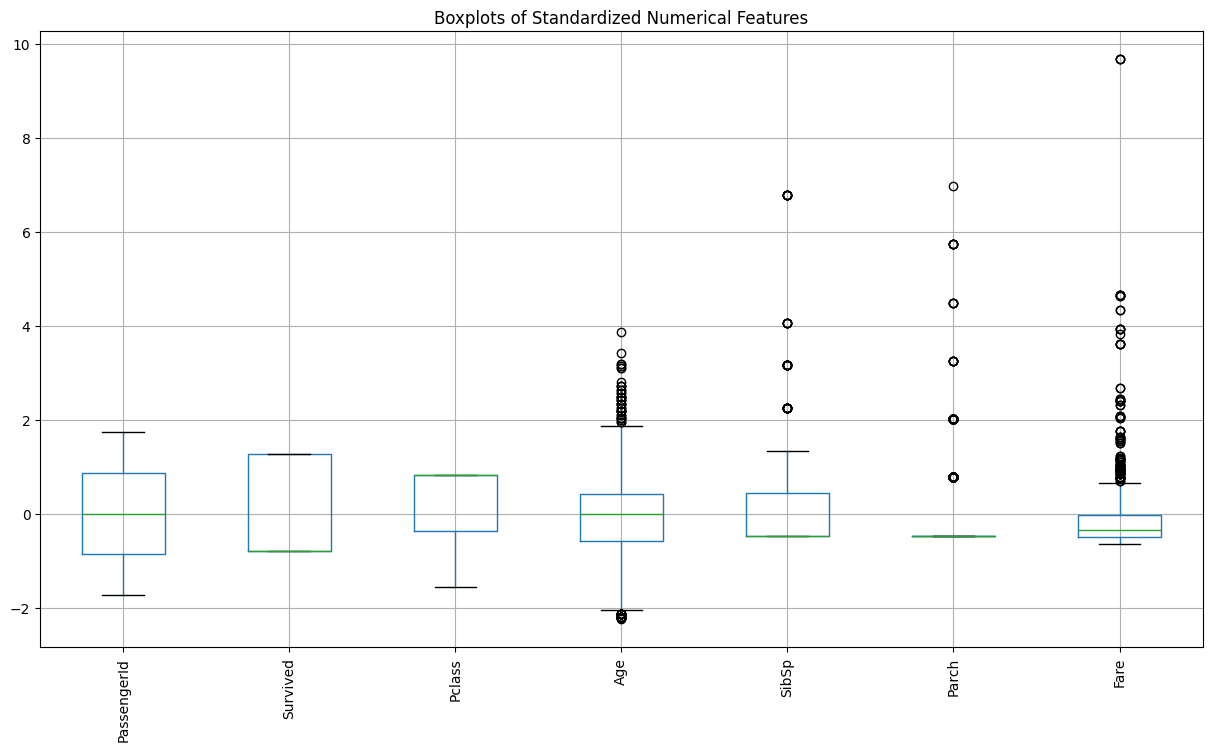


Shape after outlier removal: (561, 12)
   PassengerId  Survived    Pclass  Name  Sex       Age     SibSp     Parch  \
0    -1.730108 -0.789272  0.827377   108    1 -0.592481  0.432793 -0.473674   
2    -1.722332  1.266990  0.827377   353    0 -0.284663 -0.474545 -0.473674   
3    -1.718444  1.266990 -1.566107   272    0  0.407926  0.432793 -0.473674   
4    -1.714556 -0.789272  0.827377    15    1  0.407926 -0.474545 -0.473674   
5    -1.710669 -0.789272  0.827377   554    1  0.000000 -0.474545 -0.473674   

   Ticket      Fare  Cabin  Embarked  
0     523 -0.502445     47         2  
2     669 -0.488854     47         2  
3      49  0.420730     55         2  
4     472 -0.486337     47         2  
5     275 -0.478116     47         1  


In [7]:
# Step 5: Visualize outliers using boxplots and remove them
# Visualize boxplots
plt.figure(figsize=(15, 8))
df[numerical_cols].boxplot(rot=90)
plt.title("Boxplots of Standardized Numerical Features")
plt.show()

# Remove outliers using IQR method
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df_cleaned = remove_outliers_iqr(df, numerical_cols)

print("\nShape after outlier removal:", df_cleaned.shape)
print(df_cleaned.head())
